In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import time
import os
import random

## Building the dataset
Looping over the files in json and the files in npy to create only one file in json

1) ouvrir 1 fichier json et son correspondant en npy

In [131]:
%%time
category_0 = map(json.loads, open('../raw_data/json format/airplane.ndjson'))
df_0 = pd.DataFrame.from_records(category_0)
df_0

CPU times: user 6.22 s, sys: 3.36 s, total: 9.59 s
Wall time: 9.26 s


,word,countrycode,timestamp,recognized,key_id,drawing
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ..."
1,airplane,CA,2017-03-06 21:39:04.69013 UTC,False,6622904974311424,"[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ..."
...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2..."


In [132]:
np_data_0 = np.load('../raw_data/npy format/airplane.npy')
np_data_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
np_data_0.shape

(151623, 784)

2) les merger

In [134]:
df_0['np_dwg'] = pd.Series(list(np_data_0))

In [135]:
df_0

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,airplane,CA,2017-03-06 21:39:04.69013 UTC,False,6622904974311424,"[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


2.1) vérifier les correspondances, puis filtrer les lignes indésirables

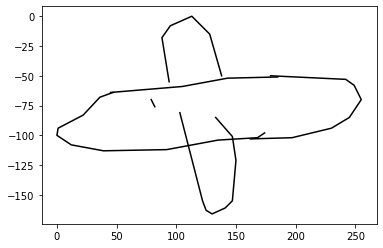

In [136]:
drawing = df_0['drawing'][156]
for trait in drawing:
    plt.plot(trait[0], [-1*y for y in trait[1]], color = 'black')

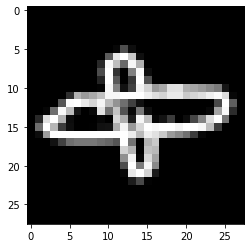

In [137]:
img = np.array(df_0['np_dwg'][156]).reshape(28, 28)
plt.imshow(img, cmap='gray')

In [138]:
df_0 = df_0[df_0['recognized'] == True]

In [139]:
df_0

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,airplane,US,2017-03-02 19:06:55.49465 UTC,True,5509429904539648,"[[[195, 164, 127, 40, 13, 0, 4, 28, 93, 172, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


2.2) limiter à 10k lignes

In [141]:
df_0 = df_0.loc[:10000]

3) écrire le fichier mergé en json dans le bon dossier

In [151]:
df_0.to_json('../raw_data/Compiled format/airplane.ndjson',
           orient="records",
           lines=True)

In [152]:
category_test = map(json.loads, open('../raw_data/Compiled format/airplane.ndjson'))
df_test = pd.DataFrame.from_records(category_test)

In [153]:
df_test

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,US,2017-03-02 19:06:55.49465 UTC,True,5509429904539648,"[[[195, 164, 127, 40, 13, 0, 4, 28, 93, 172, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
8972,airplane,US,2017-01-27 18:17:35.32934 UTC,True,5354202274463744,"[[[163, 163], [182, 181]], [[147, 143, 146, 15...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8973,airplane,BR,2017-01-26 00:20:55.19129 UTC,True,5426569352839168,"[[[14, 63, 129, 205], [64, 63, 56, 54]], [[206...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8974,airplane,RU,2017-03-16 14:27:27.55236 UTC,True,4570916770021376,"[[[120, 52, 28, 0, 2, 10, 35, 55, 203], [71, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8975,airplane,RU,2017-01-26 06:50:16.83994 UTC,True,4664581219680256,"[[[104, 80, 38, 11, 3, 0, 4, 21, 102], [68, 64...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


4) looper

In [165]:
!ls

'Etienne Draft.ipynb'


In [166]:
import os

for npy_file, json_file in zip(sorted(os.listdir('../raw_data/npy format')), sorted(os.listdir('../raw_data/json format'))):
    print(npy_file, json_file)
print(len(os.listdir('../raw_data/npy format')))

airplane.npy airplane.ndjson
ambulance.npy ambulance.ndjson
angel.npy angel.ndjson
ant.npy ant.ndjson
anvil.npy anvil.ndjson
apple.npy apple.ndjson
arm.npy arm.ndjson
asparagus.npy asparagus.ndjson
axe.npy axe.ndjson
backpack.npy backpack.ndjson
banana.npy banana.ndjson
bandage.npy bandage.ndjson
barn.npy barn.ndjson
baseball.npy baseball.ndjson
basket.npy basket.ndjson
basketball.npy basketball.ndjson
bat.npy bat.ndjson
bathtub.npy bathtub.ndjson
beach.npy beach.ndjson
bear.npy bear.ndjson
beard.npy beard.ndjson
bed.npy bed.ndjson
bee.npy bee.ndjson
belt.npy belt.ndjson
bench.npy bench.ndjson
bicycle.npy bicycle.ndjson
binoculars.npy binoculars.ndjson
bird.npy bird.ndjson
blackberry.npy blackberry.ndjson
blueberry.npy blueberry.ndjson
book.npy book.ndjson
boomerang.npy boomerang.ndjson
bottlecap.npy bottlecap.ndjson
bowtie.npy bowtie.ndjson
bracelet.npy bracelet.ndjson
brain.npy brain.ndjson
bread.npy bread.ndjson
bridge.npy bridge.ndjson
broccoli.npy broccoli.ndjson
broom.npy broom.n

In [168]:
%%time

nlignes = 10_000

tot = len(os.listdir('../raw_data/npy format'))
i = 1


for npy_file, json_file in zip(sorted(os.listdir('../raw_data/npy format')), sorted(os.listdir('../raw_data/json format'))):
    
    start = time.time()
    print(f"doing {i}/{tot}...")
    i = i+1
    print(npy_file, json_file, '...')
    
    #opening the files
    category = map(json.loads, open('../raw_data/json format/'+str(json_file)))
    df = pd.DataFrame.from_records(category)
    np_data = np.load('../raw_data/npy format/'+str(npy_file))
    
    #merging
    df['np_dwg'] = pd.Series(list(np_data))
    
    #filtering
    df = df[df['recognized'] == True]
    
    #limiting to 10k lines
    df = df.head(nlignes)
    
    df.reset_index(drop=True, inplace = True)
    
    #writing the new file in ndjson
    df.to_json('../raw_data/Compiled format/'+npy_file.split('.')[0]+'.ndjson',
           orient="records",
           lines=True)
    
    print(f"finito, en {time.time() - start} secondes")

doing 1/294...
airplane.npy airplane.ndjson ...
finito, en 94.744375705719 secondes
doing 2/294...
ambulance.npy ambulance.ndjson ...
finito, en 17.33797597885132 secondes
doing 3/294...
angel.npy angel.ndjson ...
finito, en 10.365846395492554 secondes
doing 4/294...
ant.npy ant.ndjson ...
finito, en 24.316879987716675 secondes
doing 5/294...
anvil.npy anvil.ndjson ...
finito, en 6.8027098178863525 secondes
doing 6/294...
apple.npy apple.ndjson ...
finito, en 5.299197435379028 secondes
doing 7/294...
arm.npy arm.ndjson ...
finito, en 19.638988733291626 secondes
doing 8/294...
asparagus.npy asparagus.ndjson ...
finito, en 13.867887496948242 secondes
doing 9/294...
axe.npy axe.ndjson ...
finito, en 3.33331036567688 secondes
doing 10/294...
backpack.npy backpack.ndjson ...
finito, en 4.280959367752075 secondes
doing 11/294...
banana.npy banana.ndjson ...
finito, en 28.35089349746704 secondes
doing 12/294...
bandage.npy bandage.ndjson ...
finito, en 75.55982899665833 secondes
doing 13/294.

finito, en 10.203537464141846 secondes
doing 100/294...
fan.npy fan.ndjson ...
finito, en 44.032859802246094 secondes
doing 101/294...
feather.npy feather.ndjson ...
finito, en 5.8073320388793945 secondes
doing 102/294...
fence.npy fence.ndjson ...
finito, en 25.843209743499756 secondes
doing 103/294...
finger.npy finger.ndjson ...
finito, en 7.425633907318115 secondes
doing 104/294...
fireplace.npy fireplace.ndjson ...
finito, en 14.756658792495728 secondes
doing 105/294...
firetruck.npy firetruck.ndjson ...
finito, en 46.89279127120972 secondes
doing 106/294...
fish.npy fish.ndjson ...
finito, en 6.267749547958374 secondes
doing 107/294...
flamingo.npy flamingo.ndjson ...
finito, en 59.17901301383972 secondes
doing 108/294...
flashlight.npy flashlight.ndjson ...
finito, en 38.5678493976593 secondes
doing 109/294...
flower.npy flower.ndjson ...
finito, en 65.7728853225708 secondes
doing 110/294...
foot.npy foot.ndjson ...
finito, en 9.11024808883667 secondes
doing 111/294...
fork.npy 

finito, en 27.77203369140625 secondes
doing 197/294...
pliers.npy pliers.ndjson ...
finito, en 8.476301908493042 secondes
doing 198/294...
pond.npy pond.ndjson ...
finito, en 17.609776496887207 secondes
doing 199/294...
pool.npy pool.ndjson ...
finito, en 5.711570501327515 secondes
doing 200/294...
popsicle.npy popsicle.ndjson ...
finito, en 3.697615623474121 secondes
doing 201/294...
postcard.npy postcard.ndjson ...
finito, en 8.297762155532837 secondes
doing 202/294...
potato.npy potato.ndjson ...
finito, en 26.05965256690979 secondes
doing 203/294...
purse.npy purse.ndjson ...
finito, en 4.458508253097534 secondes
doing 204/294...
rabbit.npy rabbit.ndjson ...
finito, en 21.07136106491089 secondes
doing 205/294...
raccoon.npy raccoon.ndjson ...
finito, en 15.723167419433594 secondes
doing 206/294...
radio.npy radio.ndjson ...
finito, en 5.625356435775757 secondes
doing 207/294...
rain.npy rain.ndjson ...
finito, en 11.620761394500732 secondes
doing 208/294...
rainbow.npy rainbow.ndjs

finito, en 27.175988912582397 secondes
doing 293/294...
zebra.npy zebra.ndjson ...
finito, en 25.768071174621582 secondes
doing 294/294...
zigzag.npy zigzag.ndjson ...
finito, en 4.4254209995269775 secondes
CPU times: user 54min 21s, sys: 8min 39s, total: 1h 3min
Wall time: 1h 7min 26s


catégorie 1/10 : cannon


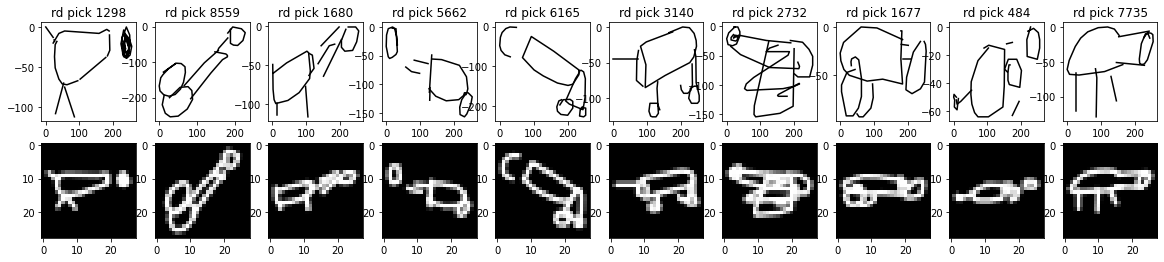

catégorie 2/10 : camel


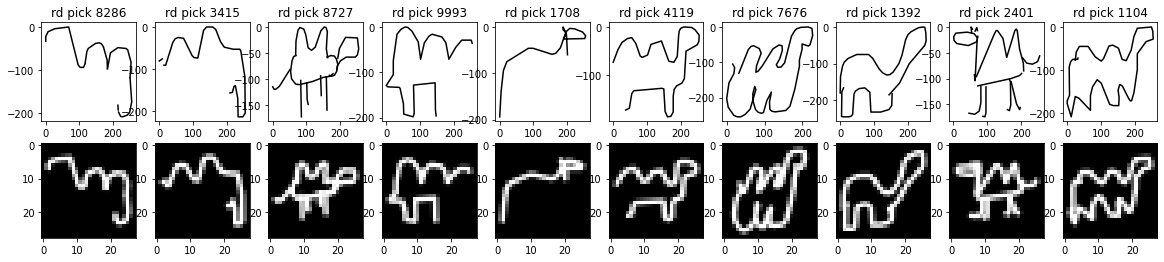

catégorie 3/10 : pineapple


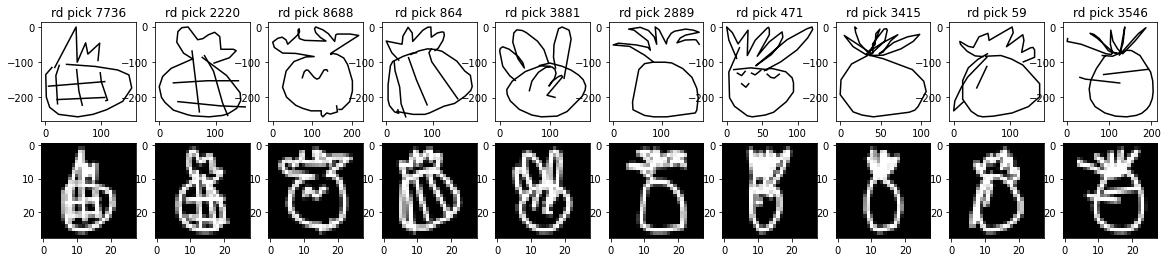

catégorie 4/10 : elephant


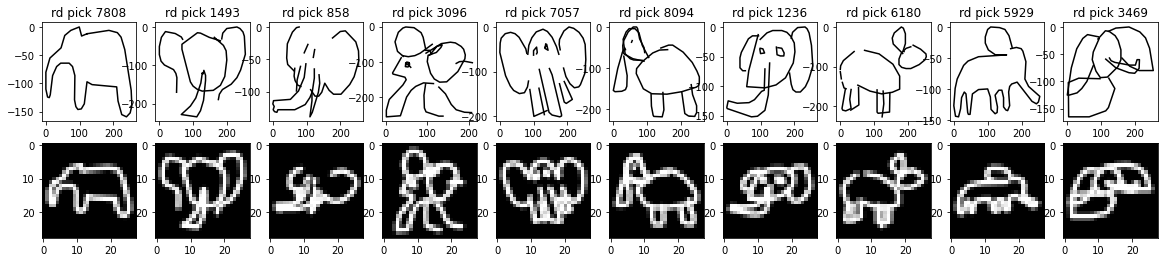

catégorie 5/10 : squirrel


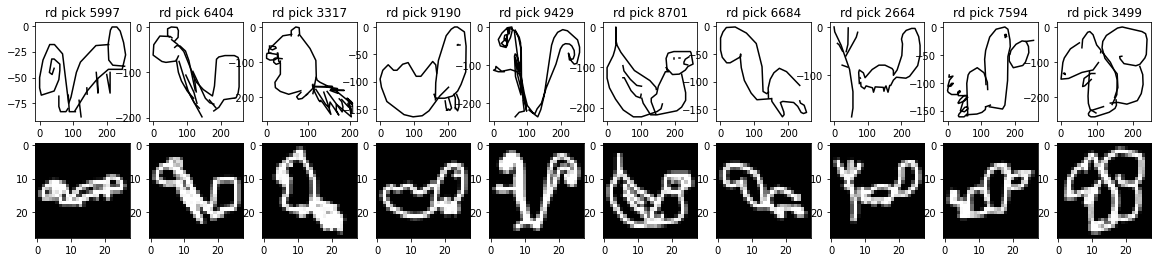

catégorie 6/10 : headphones


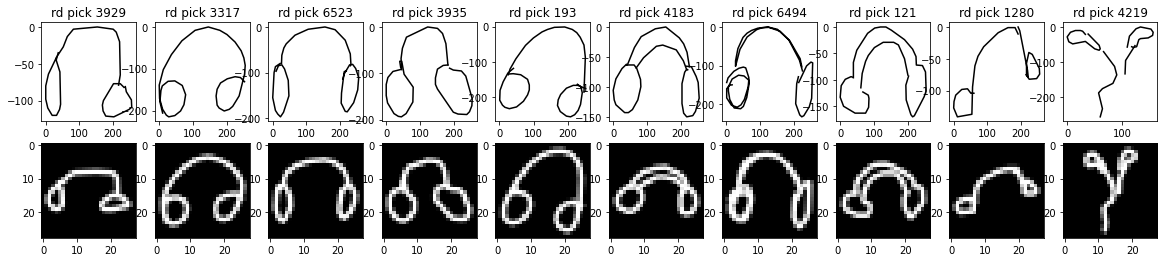

catégorie 7/10 : church


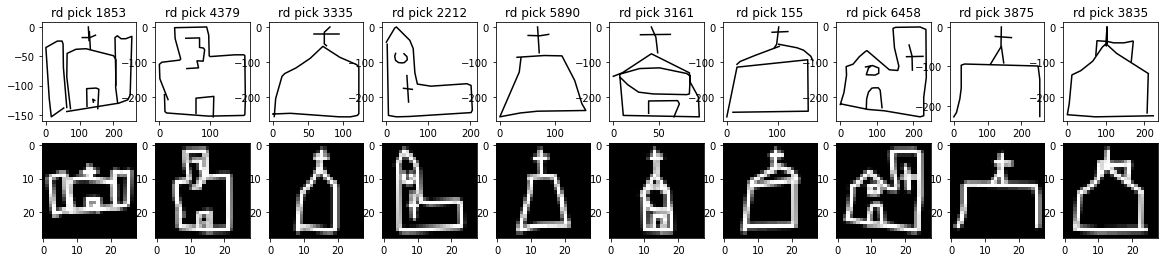

catégorie 8/10 : pond


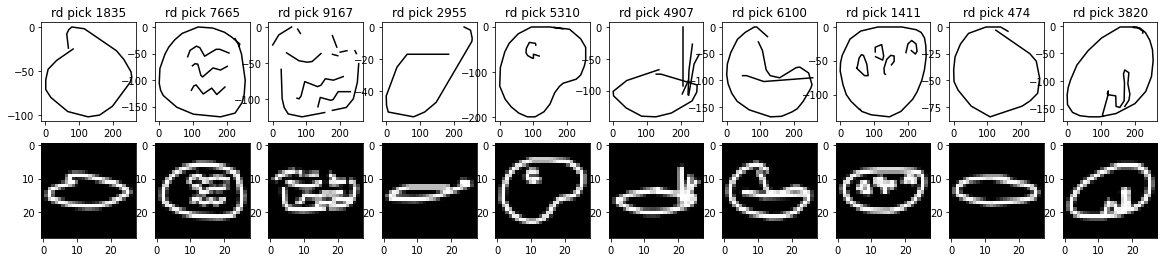

catégorie 9/10 : broom


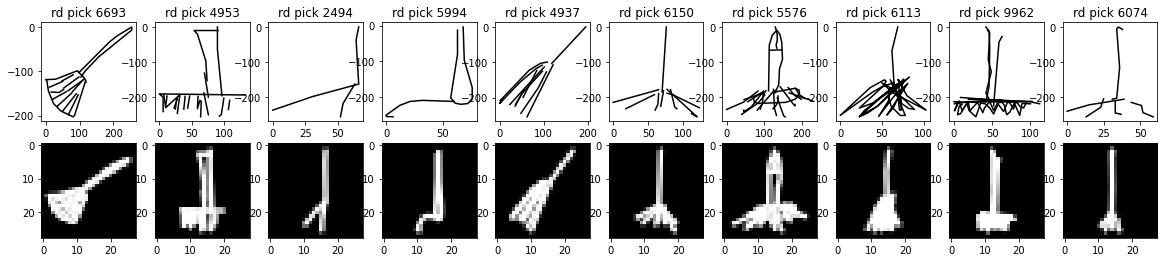

catégorie 10/10 : syringe


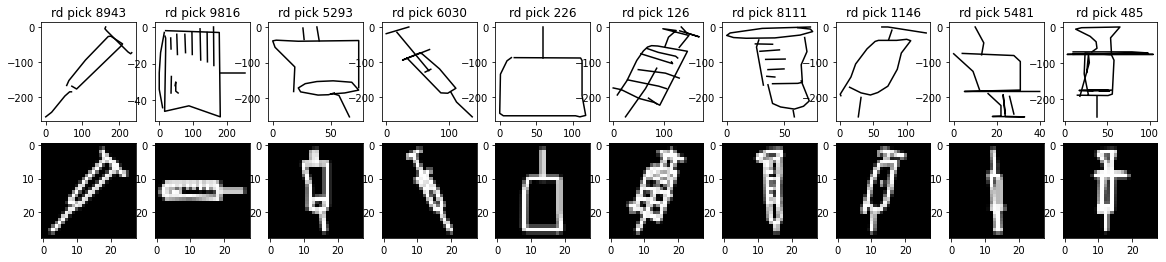

In [13]:
n_cat = 10

rd_cat = random.choices(sorted(os.listdir('../raw_data/Compiled format')), k=n_cat)
i = 0
for cat in rd_cat:
    
    category_test = map(json.loads, open('../raw_data/Compiled format/'+str(cat)))
    df_test = pd.DataFrame.from_records(category_test)
    i = i+1
    print(f"catégorie {i}/{n_cat} : {cat.split('.')[0]}")
    
    rd_pick = random.choices(range(10000), k=10)
    
    fig, axs = plt.subplots(2,10, figsize = (20, 4))
    
    for pick, ax in zip(rd_pick, axs[0]):
        drawing = df_test['drawing'][pick]
        for trait in drawing:
            ax.plot(trait[0], [-1*y for y in trait[1]], color = 'black')
        ax.title.set_text(f"rd pick {pick}")
    
    for pick, ax in zip(rd_pick, axs[1]):
        img = np.array(df_test['np_dwg'][pick]).reshape(28, 28)
        ax.imshow(img, cmap='gray')
        
    
    plt.show()


In [8]:
category_test = map(json.loads, open('../raw_data/Compiled format/finger.ndjson'))
df_test = pd.DataFrame.from_records(category_test)

In [7]:
df_test

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,cloud,US,2017-01-26 20:10:46.84545 UTC,True,4746105067667456,"[[[66, 66, 72, 82, 101, 111, 126, 141, 158, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,cloud,CA,2017-03-13 04:58:37.98105 UTC,True,4791745197899776,"[[[51, 41, 28, 6, 1, 1, 6, 12, 15, 47, 72, 97,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,cloud,GB,2017-03-29 10:48:12.70277 UTC,True,5175490744680448,"[[[2, 3, 10, 30, 43, 77, 108, 116, 139, 172, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,cloud,US,2017-01-23 20:21:34.23987 UTC,True,5868899880927232,"[[[23, 22, 1, 0, 7, 18, 32, 39, 50, 65, 82, 94...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,cloud,US,2017-03-25 15:28:36.91412 UTC,True,5007611478933504,"[[[74, 24, 9, 0, 0, 6, 27, 38, 61, 65, 98, 133...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
9995,cloud,FR,2017-03-28 05:10:43.47474 UTC,True,6494892618416128,"[[[69, 60, 63, 74, 92, 129, 140, 148, 150, 145...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9996,cloud,DE,2017-01-29 14:58:57.56124 UTC,True,4638877316808704,"[[[107, 64, 7, 1, 5, 54, 75, 83, 95, 96, 93, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9997,cloud,GB,2017-01-27 21:41:45.2721 UTC,True,5535398455410688,"[[[48, 53, 63, 89, 100, 110, 115, 123, 137, 15...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9998,cloud,DE,2017-03-06 12:52:23.34589 UTC,True,5098149842518016,"[[[100, 97, 108, 135, 151, 162, 170, 172, 196,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
